##**Programação e Algoritmos II**

Prof. Alexandre Levada

###**Árvores Geradoras Mínimas (Minimum Spanning Trees)**

Árvores são grafos especiais com diversas propriedades únicas. Devido a essas propriedades são extremamente importantes na resolução de vários tipos de problemas práticos. Veremos ao longo do curso que vários problemas que estudaremos se resumem a: dado um grafo G, extrair uma árvore T a partir de G, de modo que T satisfaça uma certa propriedade (como por exemplo, mínima profundidade, mínimo peso, menores caminhos, etc).

A seguir iremos definir o que são árvores e quais são suas principais propriedades.

**Def:** Um grafo G = (V, E) é uma árvore se G é acíclico e conexo.

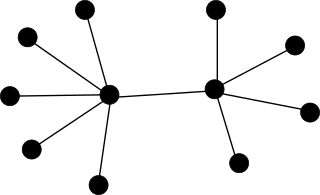


**Teorema:** G é uma árvore se e somente se existe um único caminho entre quaisquer 2 vértices de G.

(ida) $p \rightarrow q \equiv \neg q \rightarrow \neg p$

Existe um único caminho entre quaisquer $u, v \in V$ → G não é uma árvore

a) Pode existir um par $u,v \in V$ tal que não exista nenhum caminho (zero caminhos). Isso implica em G desconexo, o que significa que G não é uma árvore. (OK)

b) Pode existir um par $u,v \in V$ tal que exista mais de um caminho.

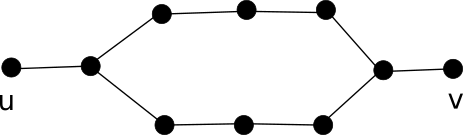

Mas isso ocorre quando há bifurcação do caminho e depois uma junção, o que implica no surgimento de um ciclo C em G. 

Portanto, em ambos os casos, o grafo resultante não é uma árvore.

(volta) $q \rightarrow p \equiv \neg p \rightarrow \neg q$

G não é árvore → Não existe um único caminho entre quaisquer $u,v \in V$

Para G não ser árvore, G deve ser desconexo ou conter um ciclo. Note que no primeiro caso existe um par $u,v \in V$ tal que não há caminho entre eles. (OK)

Note também que no segundo caso existem 2 caminhos entre u e v, conforme ilustra a figura abaixo.

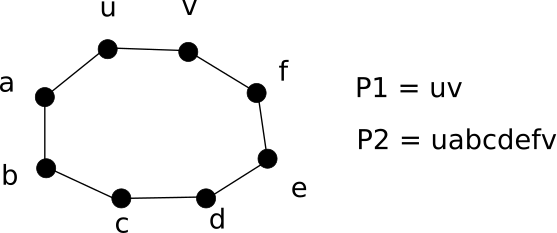

o que conclui a prova.

Iremos definir um tipo de aresta muito importante no estudo da conectividade em grafos: as arestas ponte, também conhecidas como aresta de corte.

**Def:** Uma aresta $e \in E$ é ponte se $G - e$ é desconexo. Ou seja, a remoção de uma aresta ponte desconecta o grafo.

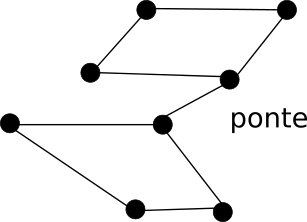

A pergunta que surge é: como identificar arestas pontes?

A abordagem mais simples seria na tentativa e erro, ou seja, remove-se uma a uma as arestas e verifca-se quando o grafo é desconectado. Porém, obviamente essa é uma estratégia totalmente inviável quando temos grafos com muito vértices.

O resultado a seguir nos fornece um modo objetivo de caracterizar arestas pontes.

**Teorema:** Uma aresta $e \in E$ é ponte se e somente se ela não pertence a um ciclo C.

(ida) $p \rightarrow q \equiv \neg q \rightarrow \neg p$

Aresta e pertence a um ciclo C → aresta e não é ponte

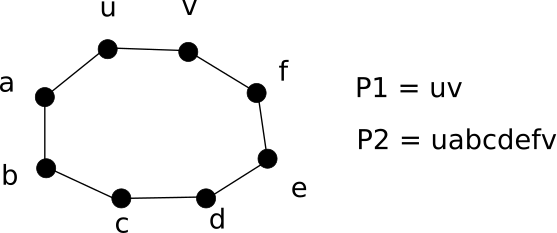

Como aresta pertence a um ciclo C, há 2 caminhos entre u e v. Logo a remoção da aresta e = (u,v) não impede que o grafo seja conexo, ou seja, G – e ainda é conexo por causa da existência do caminho mais longo P2. Portanto, aresta e não é ponte.

(volta) $q \rightarrow p \equiv \neg p \rightarrow \neg q$

A aresta e não é ponte → aresta e pertence a um ciclo

Se a aresta e não é ponte então G – e ainda é conexo. Se isso ocorre, deve-se ao fato de que em G – e ainda existe um caminho entre u e v que não passa por e. Logo, em G existem existem 2 caminhos, o que nos leva a conclusão de que a união entre os 2 caminhos gera um ciclo C.

O resultado a seguir caracteriza uma árvore em termos de arestas pontes.

**Teorema:** G = (V, E) é uma árvore se e somente se toda aresta $e \in E$ é ponte.

(ida) $p \rightarrow q \equiv \neg q \rightarrow \neg p$

Se existe aresta $e \in E$ não ponte → G não é árvore

A existência de uma aresta não ponte implica na existência de ciclo C.

A presença de um ciclo C faz com que G não seja um árvore

(volta) $q \rightarrow p \equiv \neg p \rightarrow \neg q$

G não é árvore → existe uma aresta $e \in E$ não ponte

Para G não ser uma árvore, deve existir um ciclo em G.

Logo, todas as arestas pertencentes ao ciclo não são pontes.

O resultado a seguir nos diz que se temos uma árvore de n vértices, então o seu número de arestas está pré-determinado.

**Teorema:** Se G = (V, E) é uma árvore com |V| = n então |E| = m = n - 1

Prova por indução

P(n): Toda árvore de n vértices possui n – 1 arestas

Base: P(1): n = 1 vértice → 0 arestas (OK)

Passo de indução: P(n) → P(n + 1) para n arbitrário

1. Seja $T = (V_T, E_T)$ com $|V_T|$ = n + 1, ou seja, tem n + 1 vértices.

2. Seja $v \in V_T$ uma folha na árvore T

3. Seja $T’ = (V_T', E_T')$ a árvore obtida removendo v e a única aresta incidente a v, ou seja: T’ = T – v

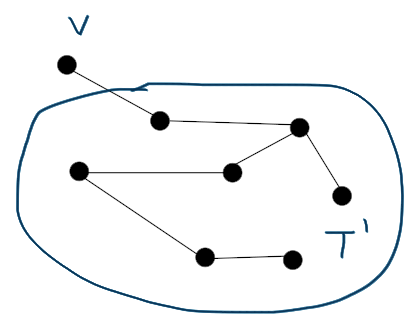



4. Note que T’ é uma árvore, pois como T é conexo, T’ também é e como T é acíclico, T’ também é. Logo, T’ possui n’ vértices e m’ arestas.

5. Mas pela hipótese de indução, toda árvore de n’ vértices tem n’- 1 arestas, então m’ = n’ – 1

6. Como  T’ tem exatamente uma aresta e um vértice a menos que T:

	m’ = m – 1 = n’ – 1 = (n – 1) – 1 

o que implica em m – 1 = n – 1 – 1, ou seja, m = n – 1. A prova está concluída.

**Teorema:** A soma dos graus de uma árvore de n vértices não depende da lista de graus, sendo dada por 2n – 2.

Prova:

$$
\sum_{i=1}^{n} d(v_i) = 2 m = 2 (n - 1) = 2n - 2 
$$

**Def:** Árvore geradora (spanning tree)

Seja $G = (V, E)$ um grafo. Dizemos que $T = (V, E_T)$ é uma árvore geradora de G se T é um subgrafo de G que é uma árvore (ou seja tem que conectar todos os n vértices com apenas n - 1 arestas).

A figura seguir ilustra alguns exemplos de árvores geradoras mínimas.

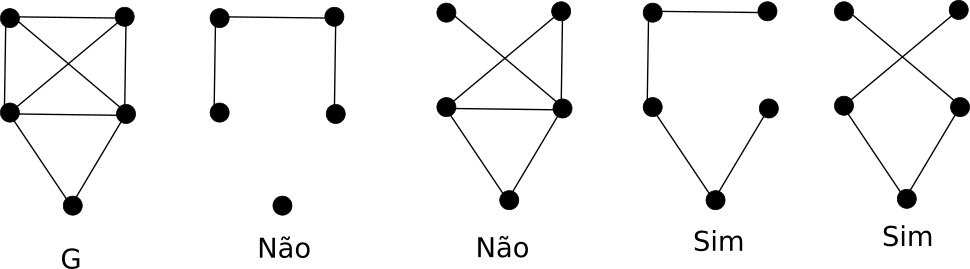

###**O Problema da Árvore Geradora Mínima**

O objetivo da seção em questão consiste em fornecer algoritmos para resolver o seguinte problema: dado um grafo ponderado G, obter dentre todas as árvores geradoras possíveis, aquela com o menor peso.

**Definição do problema:** Dado $G = (V, E, w)$, onde $w: E → R^+$ (função de custo para arestas), obter a árvore geradora T que minimiza o seguinte critério:

$$
w(T) = \sum_{e \in T}w(e)
$$

**Exemplo:** Suponha que uma operadora de internet irá instalar fibra ótica pela cidade de modo a interligar todos os bairros. Inicialmente, pode ser realizado um estudo do custo da ligação entre todos os pares de bairros que são vizinhos. Isso irá gerar um grafo ponderado. Se desejarmos minimizar o custo da interligação, devemos ter o número mínimo de arestas para que o grafo seja conexo, ou seja devemos extrair uma árvore geradora. Dentre todas as possíveis árvores geradoras, sem dúvidas, a melhor opção em termos financeiros é a árvore geradora mínima.

**Ideia geral:** utilizar uma abordagem iterativa, de modo que, a cada passo, devemos escolher a aresta de menor peso que seja segura (estratégia gulosa).

Aresta segura = aresta que ao ser inserida não faz a árvore deixar de ser árvore

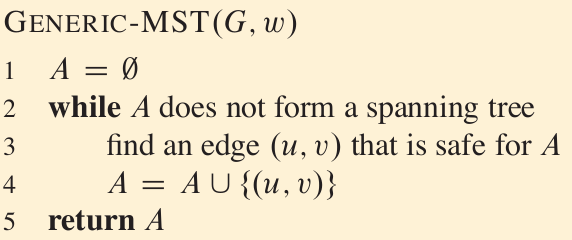

Como determinar se uma aresta é segura? Depende do algoritmo em questão, cada um deles tem suas próprias definições. Ou seja, cada algoritmo propõe suas especificações próprias para isso.

###**Algoritmo de Kruskal**

O algoritmo de Kruskal encontra uma aresta segura para adicionar à floresta em crescimento, encontrando, de todas as arestas que conectam duas árvores quaisquer na floresta, uma aresta $(u, v)$ com o menor
peso. Em outras palavras, o objetivo consiste em escolher a cada passo a aresta de menor peso que não forme um ciclo. Trata-se de um algoritmo guloso.

Uma metodologia para evitar a formação de ciclos pode ser implementada utilizando a seguinte ideia: inicialmente cria-se n árvores de zero arestas (cada vértice é colocado numa árvore distinta) e cada vez que uma aresta é inserida, os dois vértices extremidades passam a fazer parte da mesma árvore. Assim, arestas que ligam vértices da mesma árvore, ou seja, que formam ciclos, jamais serão permitidas.

Para isso, podemos utilizar 3 primitivas básicas:

1. make_set(v): cria uma árvore contendo um único vértice v

2. find_set(v): retorna qual é a árvore que o vértice v pertence

3. union(u, v): faz a união das árvores de u e v, criando uma única árvore

A seguir apresentamos o pseudocódigo do algoritmo de Kruskal.

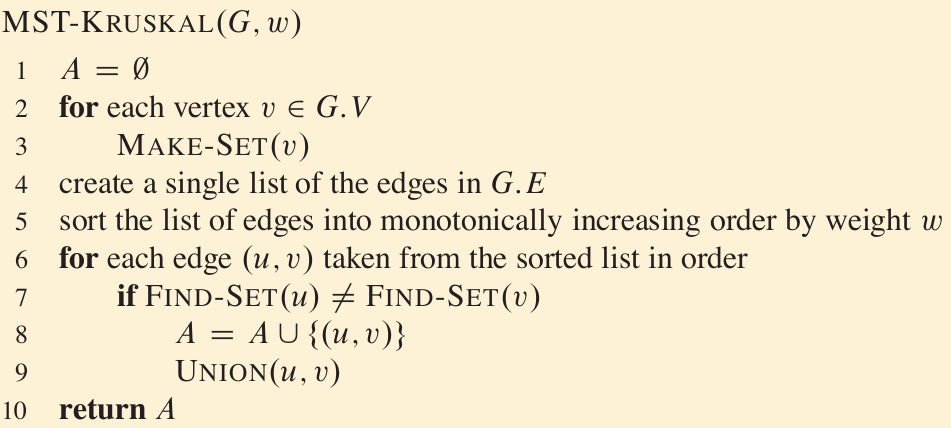


O algoritmo de Kruskal inicia colocando cada vértice como sendo a raiz de uma árvore de zero arestas, de modo que se temos n vértices, teremos n árvores distintas (uma com sua própria raiz). A seguir, é criada uma lista com todas as arestas de G e essa lista é ordenada em ordem crescente pelos pesos das arestas. Em outras palavras, a aresta de menor peso será aprimeira da lista, a de segundo maior peso será a segunda, etc. até que a última aresta da lista será a de maior peso. O loop principal do algoritmo executa escolhendo as arestas dessa lista ordenada e para cada uma delas verifica se seus vértices extremidades estão em árvores distintas. Se estiverem, então trata-se de uma aresta segura e ela será adicionada à árvore geradora mínima. Após a inserção da aresta, é realizada a união das duas árvores que agora são uma só, dado que a adição da aresta (u, v) implica na junção da árvore de u com a árvore de v.

A seguir iremos realizar um trace completo do algoritmo (simulação passo a passo). Para isso iremos considerar a seguinte notação:

$E^{-}$: conjunto das arestas de peso mínimo não seguras ( find_set(u) = find_set(v) )

$E^{+}$: conjunto das arestas de peso mínimo seguras ( find_set(u) != find_set(v) )

$e_k$: aresta escolhida no passo k

Ex: Suponha que os vértices representem bairros e as arestas com pesos os custos de interligação desses bairros.

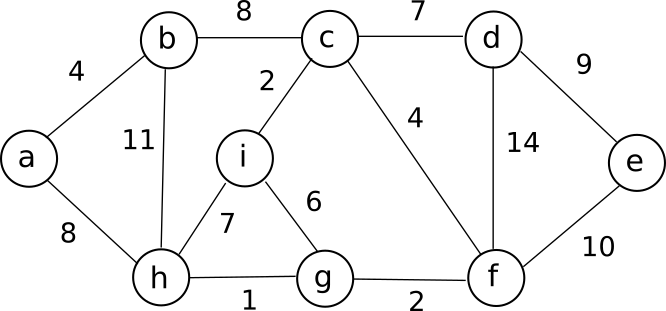




A lista de arestas ordenadas por pesos é: 

E = [(g, h), (c, i), (g, f), (a, b), (c, f), (g, i), (c, d), (h, i), (a, h), (b, c), (d, e), (e, f), (b, h), (d, f)]

P = [1, 2, 2, 4, 4, 6, 7, 7, 8, 8, 9, 10, 11, 14]

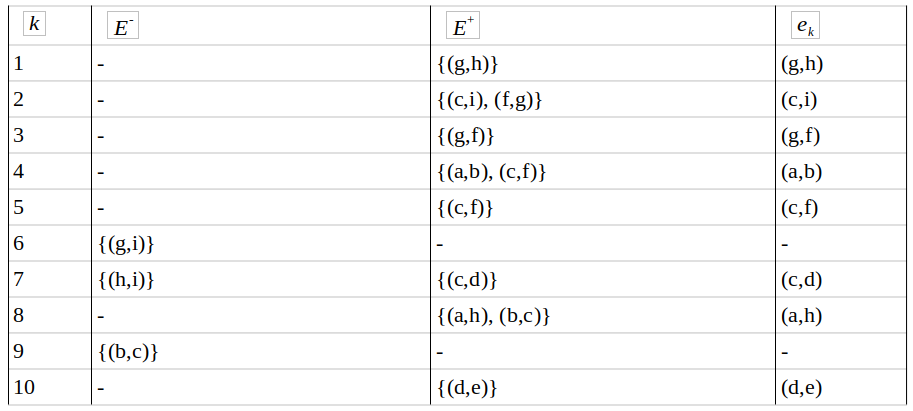

A seguir iremos demonstrar a otimalidade do algoritmo de Kruskal. O teorema a seguir garante que o algoritmo sempre funciona e retorna sempre a solução ótima (melhor possível).

**Teorema:** Toda árvore T gerada pelo algoritmo de Kruskal é uma MST de G (árvore geradora de custo mínimo).

Prova por contradição:

Seja T é a árvore retornada por Kruskal.

1. Suponha que exista uma árvore $S \neq T$ tal que $w(S) < w(T)$.

2. Seja $e_k \in T$ a primeira aresta adicionada em T que não está em S (pois árvores são diferentes).

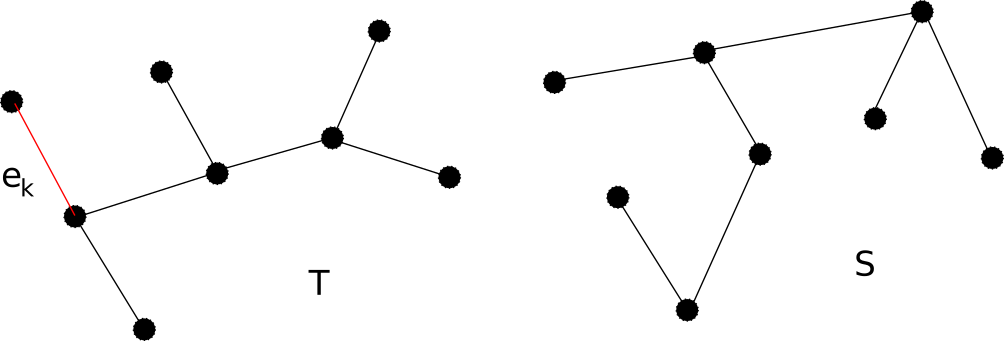

3. Faça $H = S + e_k$. Note que $H$ não é mais uma árvore e contém exatamente um ciclo.

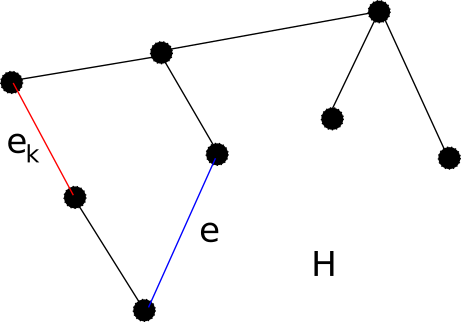


4. Note que no ciclo C, existe uma aresta $e \in S$ tal que $\nexists e \in T$ (pois senão o ciclo C existiria em T). Assim, o subgrafo $H - e$ é conexo, possui n - 1 arestas e define uma árvore geradora de G.

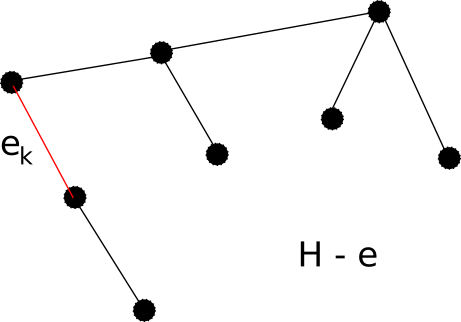

5. Porém, $w(e_k) \leq w(e)$ e assim $w(H-e) \leq w(S)$ (pois de acordo com o algoritmo de Kruskal $e_k$ vem antes de $e$ na lista ordenada de arestas. É garantido pela ordenação).

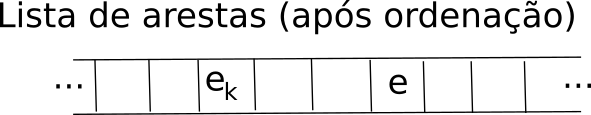

6. Repetindo o processo usado para gerar $H-e$ a partir de $S$ é possível produzir uma sequência de árvores que se aproximam cada vez mais de $T$.

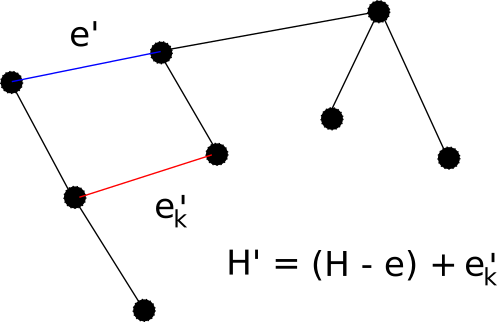

$$
S → (H - e) → (H’ - e’) → (H’’ - e’’) → … → T
$$

de modo que 

$$
w(S) \geq w(H-e) \geq w(H'-e') \geq ... \geq w(T)
$$

o que é uma contradição a suposição inicial.

Portanto, não existe árvore com peso menor que T, mostrando que T tem peso mínimo. (Não há como S ter peso menor que T).

**Análise da complexidade**

Para entender o cálculo da complexidade do algoritmo de Kruskal, primeiro precisamos entender o custo computacional de cada uma das primitivas utilizadas no algoritmo.

A primitiva MAKE-SET(v) cria uma árvore com um único elemento, v, que é justamente sua raiz. Sendo assim, é fácil perceber que ela é $O(1)$. Como essa operação é realizada n vezes, temos complexidade $O(n)$

A ordenação das arestas pode ser feita com o algoritmo Quicksort ou Mergesort que são $O(n log n)$

Já a primitiva FIND-SET(v) é um pouco mais complexa, pois dado um vértice arbitrário v, ela deve retornar qual é a árvore que ele pertence, o que é equivalente a encontrar quem é a raiz da árvore que esse vértice se encontra. No pior caso, note que esse nó v é uma folha, o que é $O(log n)$ quando temos uma árvore binária de n vértices (altura da árvore é proporcional a log n). Se a os nós puderem ter mais filhos do que apenas 2, o que mudaria é a base 2, mas continuaria sendo logaritmo. 

Por fim, a primitiva UNION(u, v) une as árvores de u e de v. Podemos pensar que a primitiva primeiro encontra a raíz da árvore de u, depois encontra a raiz da árvore de v e as conecta. Note que essa estratégia segue o padrão da primitiva FIND-SET(u) o que também é $O(log n)$.

Como as primitivas FIND-SET(v) e UNION(u, v) são realizadas uma vez para cada aresta, temos o custo total de cada uma delas é $O(m log n)$.

O custo total é portanto dado por:

$$
C = O(n) + O(n log n) + O(m log n) + O(m log n)
$$

Como todos os demais termos são dominados, a complexidade do algoritmo de Kruskal é $O(m log n)$.




###**Algoritmo de Prim**

O algoritmo de Prim cresce uma árvore a partir de uma raiz r encontrando, a cada passo, a aresta de menor custo que sai do conjunto dos vértices já visitados e chega no conjunto dos vértices ainda não descobertos. Essa restrição de que uma extremidade da aresta seja um vertice fechado e a outra extremidade da aresta seja um vértice aberto, garante que jamais iremos ter a formação de um ciclo (aresta sempre será segura). Assim como o algoritmo de Kruskal, também é considerado um algoritmo guloso.

Antes de apresentarmos o algoritmo, iremos definir as principais variáveis utilizadas por ele.

**Definição dos variáveis**

$v.key$ ou $\lambda(v)$: menor custo de aresta que conecta o vértice v a algum outro vértice do grafo (é o menor custo de entrada para o vértice v até o presente momento)

$v.\pi$ ou $\pi(v)$: predecessor de v na árvore (vértice pelo qual entrei em v)

Q: fila de prioridades dos vértices (maior prioridade = menor $\lambda(v)$)

**PSEUDOCODIGO**

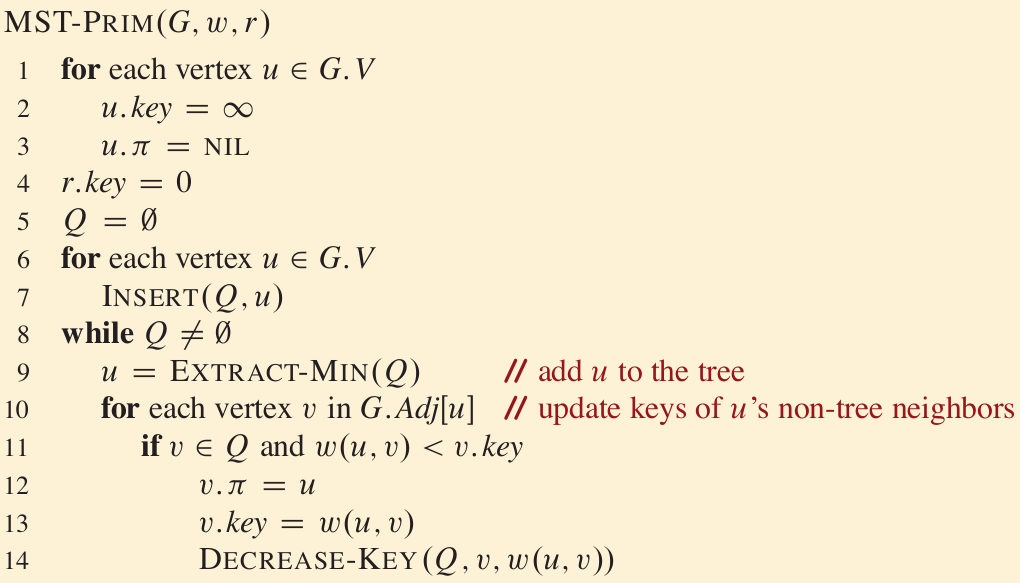

O algoritmo realiza a inicialização das variáveis atribuindo valor infinito para o custo de entrada de todos os vértices do grafo, além de setar os predecessores como NIL. O custo de entrada para a raiz é zero, pois já partimos inicialmente da raiz. Além disso, inserimos todos os vértices do grafo na fila de prioridades Q. 

Em seguida, no loop principal do algoritmo, enquanto a fila não for vazia, removemos o vértice de menor custo de entrada da fila de prioridades (u) e observamos cada um de seus vizinhos (v). Para cada vizinho v de u que ainda está na fila Q e cujo custo de entrada pela aresta (u, v) é menor que o custo de entrada atual de v, então encontramos uma aresta incidente a v de menor custo.

Note que o comando de seleção do algoritmo é equivalente ao código a seguir. A ideia é que devemos selecionar o mínimo entre v.key e w(u, v).

In [ ]:
if v in Q
    v.key = min(v.key, w(u, v))
    if v.key was updated
        v.pi = u
        DECREASE-KEY(Q, v, w(u, v))

A seguir iremos mostrar um trace completo do algoritmo de Prim.

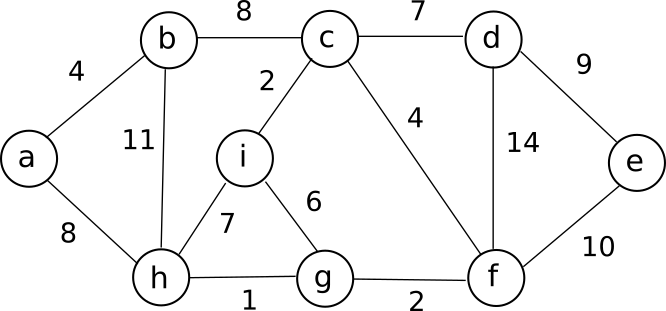

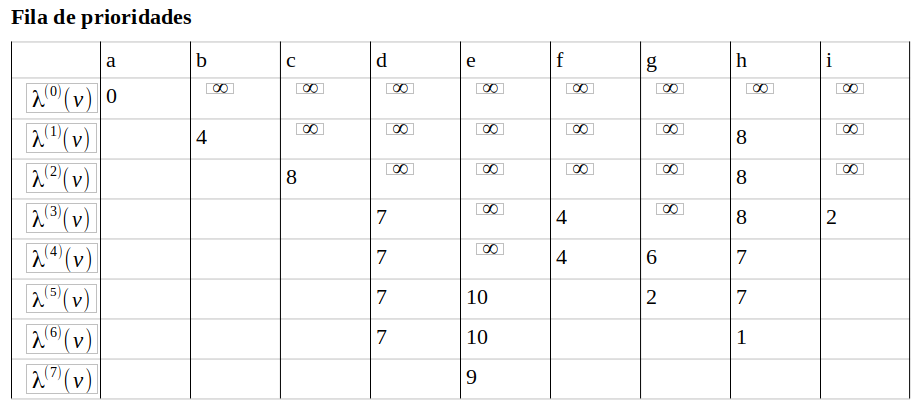

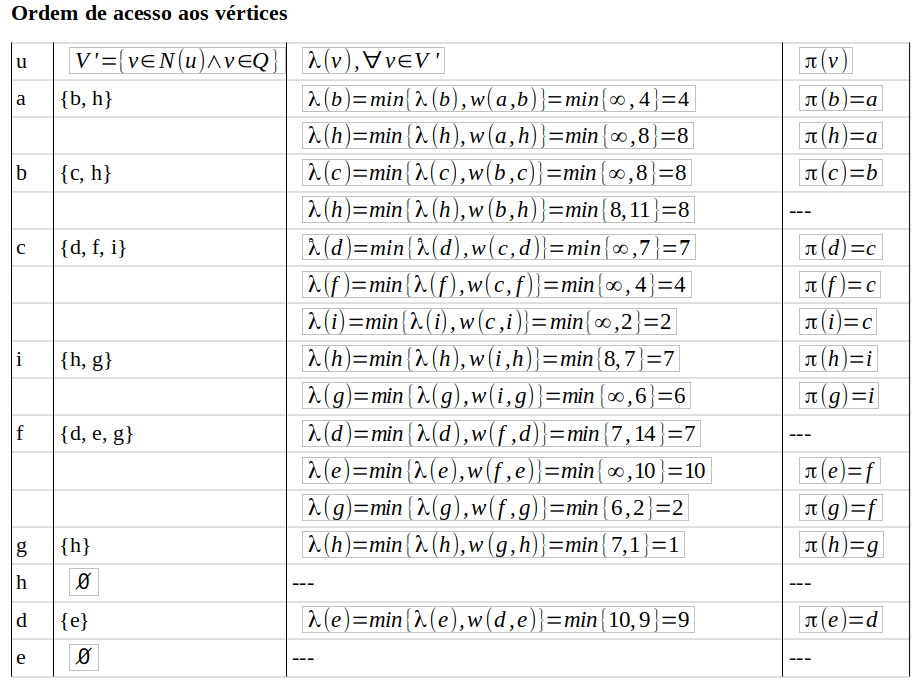

A MST do grafo em questão pode ser visualizada na figura a seguir.

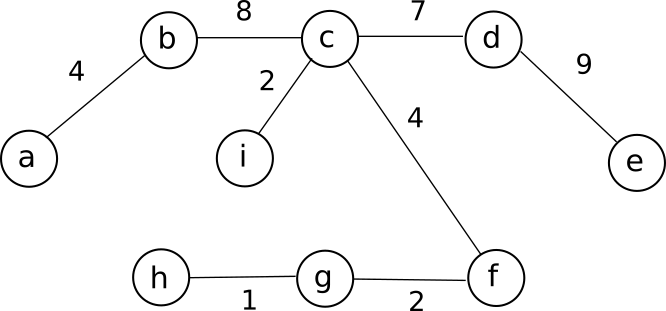

O mapa de precessores que define a MST (saída do algoritmo de Prim) pode ser visualizado a seguir.

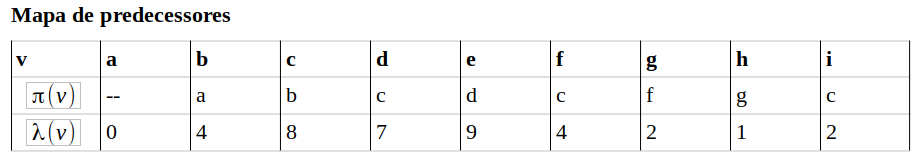

A seguir iremos demonstrar a otimalidade do algoritmo de Prim. A propriedade a seguir é a base para essa demonstração.

**Propriedade do corte:** Seja $G = (V, E, w)$ um grafo, $S$ um subconjunto qualquer de $V$ e a aresta de menor custo com exatamente uma extremidade em $S$. Então, a MST de $G$ obrigatoriamente contém a aresta $e$.

Prova por contradição:

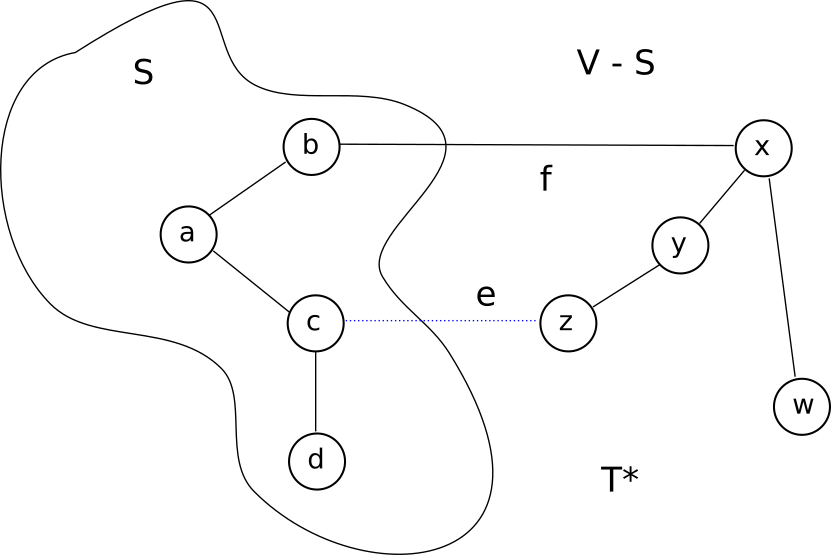



Seja $T^*$ uma MST de $G$. Suponha que $e \notin T^*$. Ao adicionar $e$ em $T^*$ cria-se um único ciclo $C$. Para que $T^* - e$ fosse uma MST, tem que haver alguma outra aresta $f$ com apenas uma extremidade em S (senão $T^*$ seria desconexo). Então $T = T^* + e - f$ também é uma árvore geradora. Como, $w(e) < w(f)$, segue que T tem peso mínimo. Portanto, T* não pode ser MST de G.

O resultado a seguir invoca a propriedade do corte para demonstrar que todas as arestas selecionadas pelo algoritmo de Prim devem estar na MST de G.

**Teorema:** A árvore $T$ obtida pelo algoritmo de Prim é uma MST de $G$. Seja $S$ o subconjunto de vértices de $G$ na árvore $T$ (conforme definido pelo algoritmo de Prim). O algoritmo de Prim adiciona em $T$ a cada passo a aresta de menor custo com apenas um vértice extremidade em $S$. Portanto, pela propriedade do corte, toda aresta $e$ adicionada pertence a MST de $G$.

**Análise da complexidade**

Basicamente, há duas formas de implementar o algoritmode de Prim: uma onde $G$ é representado pela matriz de adjacências e a fila de prioridades por um array (estruturas de dados de acesso direto) e outra em que o grafo $G$ é representado pela lista de adjacências e a fila de prioridades por um heap binário (estruturas de dados dinâmicas). Veremos a complexidade em cada uma das implementações:

1. *G = (V, E) representado por matriz de adjacências e fila de prioridades Q representada por um array (acesso direto)*

    a) A inicialização e a inserção dos vértices em Q é $O(n)$

    b) Loop while é executado n vezes (pois fila inicia cheia)

    c) Primitiva u = ExtractMin(Q) é $O(n)$ (pois é equivalente a encontrar o menor elemento em um array)

    d) as operações de atualizar os valores de v.key e do predecessor são $O(1)$, mas são realizadas k vezes, onde $k = d(u)$ (uma vez para cada vizinho de u)

    e) a operação Decrease-Key é $O(1)$ (fila de prioridades é um array de acesso direto), mas também é realizada $k = d(u)$ vezes (uma vez para cada vizinho de u.

Portanto, o custo total é dado por:

$$
O(n) + O(n)*O(n) + (O(1) + O(1) + O(1))*(d(v_1) + d(v_2) + ... + d(v_n))
$$

Pelo Handshaking Lema, a soma dos graus é igual a duas vezes o número de arestas, que é $O(m)$, temos:

$$
O(n) + O(n^2) + O(1)*O(m)
$$

Como o termo dominante é quadrático, e no pior caso o $m = O(n^2)$, temos que a complexidade do algoritmo de Prim nessa implementação é $O(n^2)$.

2. *G = (V, E) representado por lista de adjacências e fila de prioridades Q representada por um heap binário* (estruturas dinâmicas)

    a) A inicialização e a inserção dos vértices em Q é $O(n)$

    b) Loop while é executado n vezes (pois fila inicia cheia)

    c) Primitiva u = ExtractMin(Q) é $O(log n)$ (devido a altura da árvore binária: heap) (encontrar menor elemento da árvore)

    d) as operações de atualizar os valores de v.key e do predecessor são $O(1)$, mas são realizadas k vezes, onde $k = d(u)$ (uma vez para cada vizinho de u)

    e) a operação Decrease-Key é $O(log n)$ (fila de prioridades é um heap binário não permite acesso direto) (busca em árvore binária é logarítmico)

Portanto, o custo total é dado por:

$$
O(n) + O(n)*O(log n) + (O(1) + O(1) + O(log n))*(d(v_1) + d(v_2) + ... + d(v_n))
$$

Pelo Handshaking Lema, a soma dos graus é igual a duas vezes o número de arestas, que é $O(m)$, temos:

$$
O(n) + O(n log n) + O(1)*O(m) + O(m log n)
$$

Como os termos dominantes são log-lineares, a complexidade do algoritmo de Prim nessa implementação fica $O((n + m) log n)$. Mas como na grande maioria das vezes trabalhamos com grafos conexos:

$$
m \geq n - 1
$$

ou seja, m domina n, o que nos leva a uma complexidade $O(m log n)$.

A análise da complexidade nos permite concluir que a implementação 1 (matriz de adjacências + array) é mais adequada para grafos mais densos (com um número muito grande de arestas) enquanto que a implementação 2 (lista de adjacências + heap binário) é mais adequada para grafos mais esparsos (com um menor número de arestas). Em resumo, se $m$ for $O(n^2)$, usar matriz de adjacências e array de acesso direto é a melhor opção.

O código em Python a seguir mostra uma implementação do algoritmo de Prim para encontrar a MST de um grafo $G$ em que as arestas são ponderadas aleatoriamente.

Plotando grafo...


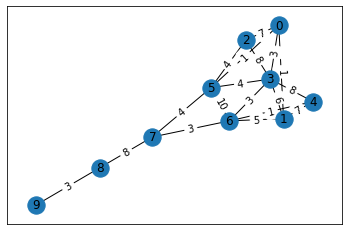

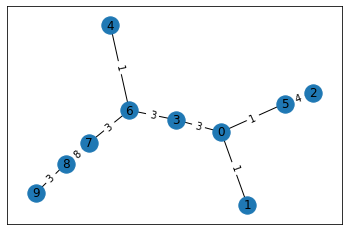

In [1]:
# Adiciona bibliotecas auxiliares
import random
import networkx as nx
import matplotlib.pyplot as plt

# Extrai o vértice de menor lambda da fila Q
def extractMin(Q, H):
    # Encontra o vértice de menor lambda em Q
    u = Q[0]
    for node in Q:
        # O vértice u armazena o vértice de menor lambda até o momento
        if H.nodes[node]['lambda'] < H.nodes[u]['lambda']:
            u = node
    # Remove u da fila
    del Q[Q.index(u)]
    # Retorna u
    return u

def Prim(G, s):
    # Dicionário para armazenar o mapa de predecessores
    P = {} 	# Estrutura de dados que mapeia uma chave a um valor
    # Inicialização do algoritmo 
    for v in G.nodes():
        G.nodes[v]['lambda'] = float('inf')
    # Custo para a raiz é 0
    G.nodes[s]['lambda'] = 0
    # Iniciar fila Q com todos os vértices
    Q = list(G.nodes())
    # Enquanto fila não estiver vazia
    while (len(Q) > 0):
        # Obter o primeiro elemento da fila
        u = extractMin(Q, G)
        # Para cada vertice adjacente a u
        for v in G.neighbors(u):
            # Se v está na fila e possui lambda > que peso de (u, v)
            if (v in Q and G.nodes[v]['lambda'] > G[u][v]['weight']):
                # Atualizar custo de v
                G.nodes[v]['lambda'] = G[u][v]['weight']
                # Adicionar u como antecessor de v
                P[v] = u
                
    # Retorna a lista de predecessores
    return P


if __name__ == '__main__':
    # Cria um grafo de exemplo
    G = nx.krackhardt_kite_graph()
    # Adicionando peso nas arestas
    for u, v in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)

    print('Plotando grafo...')
    # Cria figura para plotagem
    plt.figure(1)
    # Há vários layouts, mas spring é um dos mais bonitos
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    # Exibir figura
    plt.show()

    # Aplicando Busca em Largura
    P = Prim(G, 0)      # retorna as arestas que compõem a BFS_tree
    # Cria um grafo vaxio para árvore da busca em largura
    T = nx.Graph()
    # Inserir arestas em T
    T.add_edges_from([ (u, v) for u, v in P.items() ])
    # Obtém os pesos das arestas da árvore a partir de G
    for u, v in T.edges():
        T[u][v]['weight'] = G[u][v]['weight']

    # Cria figura para plotagem
    plt.figure(2) 
    # Define o layout
    pos = nx.spring_layout(T)
    # Plotar vertices de T
    nx.draw_networkx(T, pos, with_labels=True)
    # Plotar pesos das arestas
    labels = nx.get_edge_attributes(T, 'weight')
    nx.draw_networkx_edge_labels(T, pos, edge_labels=labels)
    # Exibir figura
    plt.show()

"Solutions are not found by pointing fingers; they are reached by extending hands." (Aysha Taryam)